### Importing Needed packages


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import math
# from sklearn import linear_model
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
%matplotlib inline

### Downloading Data

In [3]:
!wget -O books.csv https://raw.githubusercontent.com/heEXDe/some_machine_learning_jupyter_notebooks/main/books.csv

--2021-02-19 14:35:50--  https://raw.githubusercontent.com/heEXDe/some_machine_learning_jupyter_notebooks/main/books.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1187348 (1,1M) [text/plain]
Saving to: ‘books.csv’

books.csv           100%[===================>]   1,13M  5,87MB/s    in 0,2s    

2021-02-19 14:35:51 (5,87 MB/s) - ‘books.csv’ saved [1187348/1187348]



<h2 id="reading_data">Reading the data in</h2>


In [4]:
df = pd.read_csv("books.csv")
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


As we will be trying to develop a model to predict the average ratings scores for books, and because those scores can have non-integer values, our dependent values will be of the continuous nature.
Lets select some features that we want to use for regression.

In [5]:
cdf = df[['num_pages','ratings_count','text_reviews_count','average_rating']]
cdf.head(10)

,num_pages,ratings_count,text_reviews_count,average_rating
0,652,2095690,27591,4.57
1,870,2153167,29221,4.49
2,352,6333,244,4.42
3,435,2339585,36325,4.56
4,2690,41428,164,4.78
5,152,19,1,3.74
6,3342,28242,808,4.73
7,815,3628,254,4.38
8,815,249558,4080,4.38
9,215,4930,460,4.22


Lets we check if there is a linear correlationn between the independent and dependent daata - 'num_pages' and 'average_rating', 'ratings_count' and 'average_rating', 'text_reviews_count' and 'average_rating':


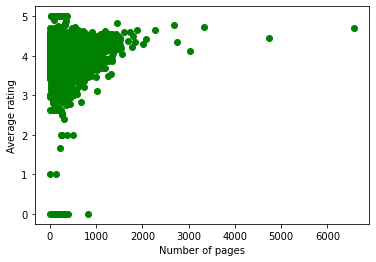

In [6]:
plt.scatter(cdf.num_pages, cdf.average_rating,  color='green')
plt.xlabel("Number of pages")
plt.ylabel("Average rating")
plt.show()

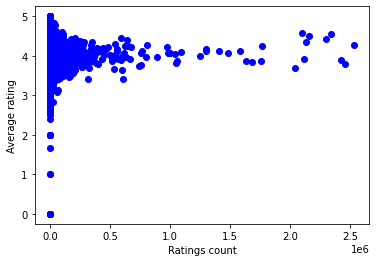

In [7]:
plt.scatter(cdf.ratings_count, cdf.average_rating,  color='blue')
plt.xlabel("Ratings count")
plt.ylabel("Average rating")
plt.show()

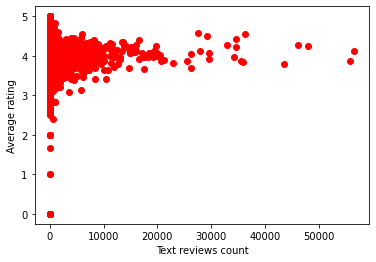

In [8]:
plt.scatter(cdf.text_reviews_count, cdf.average_rating,  color='red')
plt.xlabel("Text reviews count")
plt.ylabel("Average rating")
plt.show()

Splitting data into 'features' set and 'targets' set and setting the sizes of the train, test and evaluation sets.

In [45]:
features = cdf.drop(['average_rating'], axis = 1)
# print(features['num_pages'].unique())
targets = cdf.iloc[:, -1]
# print(targets.unique())
train_size = int((.8 * len(cdf))) - 1 # 80% of dataset for training; '-1' because of teh use of the 'ceil' method below
val_size = math.ceil(.1 * len(cdf))  # 10% for validation
test_size = math.ceil((.1 * len(cdf))) # 10% for testing
size = train_size + val_size + test_size
print(size)

8471


Spliting data according to the sizes.

In [46]:
dataset = TensorDataset(torch.Tensor(np.array(features)).int(), torch.Tensor(targets).long()) # numpy arrays to torch tensors
print(len(features))
print(len(targets))
print(len(cdf))
print(len(dataset))
train_ds, val_ds, test_ds = random_split(cdf, [train_size, val_size, test_size])

8471
8471
8471
8471


#### Train data distribution


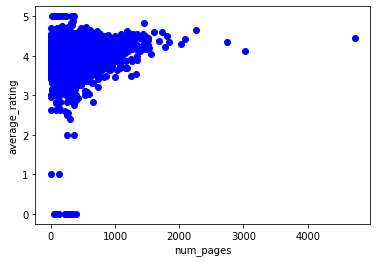

In [7]:
plt.scatter(train.num_pages, train.average_rating,  color='blue')
plt.xlabel("num_pages")
plt.ylabel("average_rating")
plt.show()